<a href="https://colab.research.google.com/github/SinaliJayasundara/Tiktok-video-reported-claims-dataset/blob/main/14517167_ML_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tiktok_claims.csv')

In [4]:
df.drop(columns = ['id','video_id'], inplace = True) # removes columns "id" and "video_id"

In [5]:
df.isnull().sum() # checking null values

,0
claim_status,298
video_duration_sec,0
video_transcription_text,298
verified_status,0
author_ban_status,0
video_view_count,298
video_like_count,298
video_share_count,298
video_download_count,298
video_comment_count,298


In [6]:
df_cleaned = df.dropna(subset=['claim_status']) # remove rows where the 'claim_status' column has missing values

In [7]:
df_cleaned.isnull().sum() # checks for null values in the cleaned dataframe

,0
claim_status,0
video_duration_sec,0
video_transcription_text,0
verified_status,0
author_ban_status,0
video_view_count,0
video_like_count,0
video_share_count,0
video_download_count,0
video_comment_count,0


In [8]:
298/len(df)*100 # percentage of missing values

1.5375090289959756

In [9]:
df_cleaned.info() # Show summary of df_cleaned: columns, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19083
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              19084 non-null  object 
 1   video_duration_sec        19084 non-null  int64  
 2   video_transcription_text  19084 non-null  object 
 3   verified_status           19084 non-null  object 
 4   author_ban_status         19084 non-null  object 
 5   video_view_count          19084 non-null  float64
 6   video_like_count          19084 non-null  float64
 7   video_share_count         19084 non-null  float64
 8   video_download_count      19084 non-null  float64
 9   video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.6+ MB


In [10]:
# text length

df_cleaned['text_length'] = df_cleaned['video_transcription_text'].str.len() # add 'text_length' column
df_cleaned = df_cleaned.drop(['video_transcription_text'], axis=1) # remove 'video_transcription_text' column

df_cleaned.head() # Show first 5 rows

<ipython-input-10-bb22c24ad773>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['text_length'] = df_cleaned['video_transcription_text'].str.len() # add 'text_length' column


,claim_status,video_duration_sec,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [11]:
df_cleaned.describe() # Generate summary statistics for numerical columns

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146,89.093534
std,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865,20.682086
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000,31.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000,75.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000,87.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000,101.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000,182.000000


In [12]:
# Split the DataFrame into features (X) and target (Y)
X = df_cleaned.drop('claim_status', axis=1) # Features (everything except 'claim_status')
Y = df_cleaned['claim_status'] # Target (the 'claim_status' column)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)

train = X_train.join(y_train) # Combine the training features and target
test = X_test.join(y_test) # Combine the testing features and target

<ipython-input-13-06ceea72bf70>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='claim_status', palette='viridis') # Create a count plot for 'claim_status'


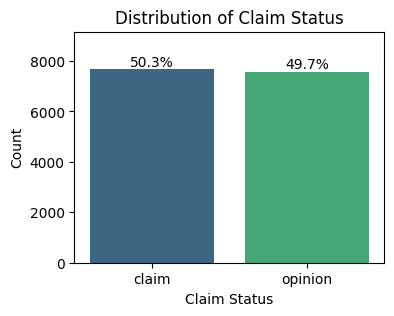

In [13]:
# Claim_status

# Plot the distribution of 'claim_status' in the training set
plt.figure(figsize=(4, 3))
sns.countplot(data=train, x='claim_status', palette='viridis') # Create a count plot for 'claim_status'

# Annotate each bar with the percentage of total entries
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height, f'{height / len(train):.1%}', ha='center', va='bottom')

# Add title and labels
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')

plt.ylim(0, len(train) * 0.6) # Adjust y-axis limits
plt.show() # Display the plot

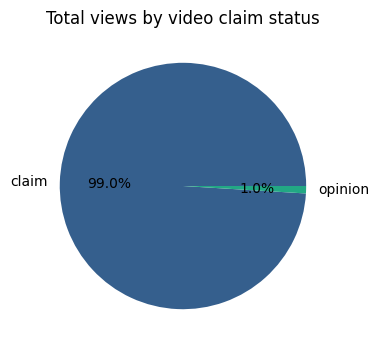

In [14]:
# Get 'viridis' colormap and select specific colors for the pie chart
cmap = plt.get_cmap('viridis')
blue = cmap(0.3)   # Pick a blue from the colormap
green = cmap(0.6)  # Pick a green from the colormap
colors = [blue, green]

# Create a pie chart to show the total video views by claim status
fig = plt.figure(figsize=(4,4))
plt.pie(train.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'], autopct='%1.1f%%', colors=colors)
# Add a title to the pie chart
plt.title('Total views by video claim status');

<ipython-input-15-89175a2a49a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='author_ban_status', palette='viridis')


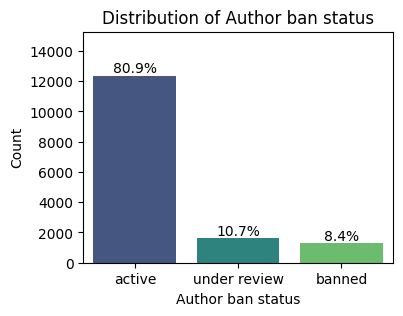

In [15]:
# author_ban_status

# Create a bar plot
plt.figure(figsize=(4, 3))
sns.countplot(data=train, x='author_ban_status', palette='viridis')

# Add percentage labels on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height, f'{height / len(train):.1%}', ha='center', va='bottom')

plt.title('Distribution of Author ban status')
plt.xlabel('Author ban status')
plt.ylabel('Count')

# Set the y-axis limit
plt.ylim(0, len(train))
plt.show()

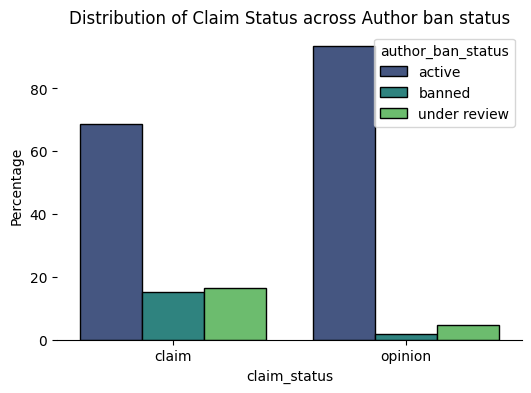

In [16]:
# Distribution of Claim Status across Author ban status

table = train.groupby(['claim_status','author_ban_status']).size().reset_index(name='Frequency')
table['Percentage'] = table.groupby('claim_status')['Frequency'].transform(lambda x: x / x.sum() * 100)
plt.figure(figsize=(6,4))
sns.barplot(data=table, x='claim_status', y='Percentage', hue='author_ban_status', edgecolor='black', palette='viridis').set(title='Distribution of Claim Status across Author ban status')

sns.set_style("whitegrid")
sns.despine(left=True)
plt.show()

<ipython-input-17-f96e4f8ea9de>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='verified_status', palette='viridis') # Count plot of 'verified_status' column


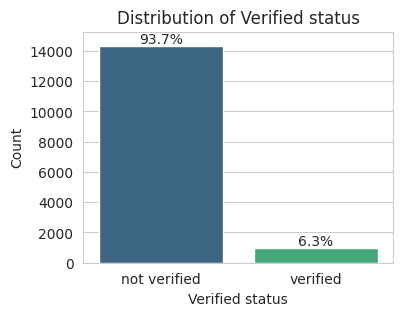

In [17]:
# verified_status

plt.figure(figsize=(4, 3))
sns.countplot(data=train, x='verified_status', palette='viridis') # Count plot of 'verified_status' column

# Annotate each bar with the percentage of total entries
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height, f'{height / len(train):.1%}', ha='center', va='bottom')

# Add title and labels for the plot
plt.title('Distribution of Verified status')
plt.xlabel('Verified status')
plt.ylabel('Count')

# Set y-axis limit
plt.ylim(0, len(train))
# Display the plot
plt.show()

In [18]:
#categorical_cols = ['verified_status', 'author_ban_status']
numerical_cols = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'text_length']

# Define transformers for numerical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols), # Apply scaling to numerical columns
       # ('cat', categorical_transformer, categorical_cols)
    ])

# Create a KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier())])

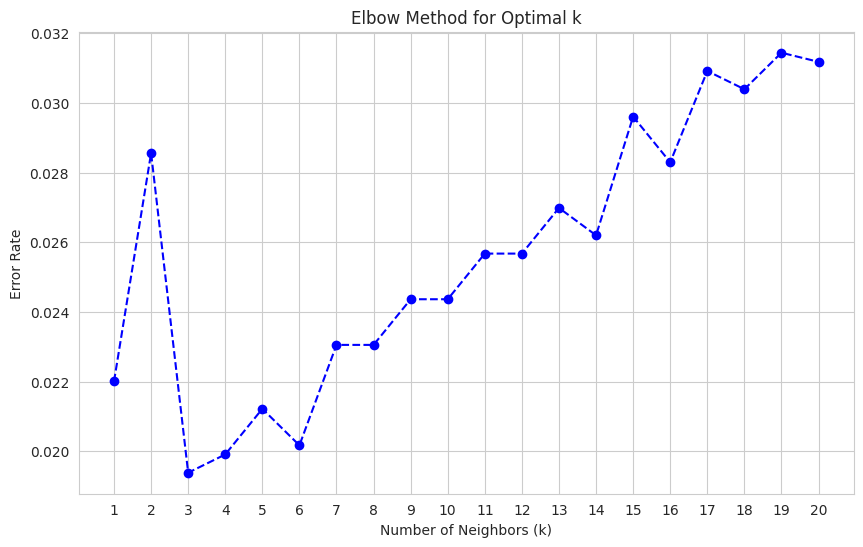

In [19]:
# Initialize an empty list to store error rates
error_rates = []

# Drop irrelevant columns from training and test sets
X_train_knn = X_train.drop(columns=['verified_status', 'author_ban_status'])
X_test_knn = X_test.drop(columns=['verified_status', 'author_ban_status'])

# Iterate over a range of k values
for k in range(1, 21):
    knn_pipeline.set_params(classifier__n_neighbors=k)     # Set the number of neighbors for KNN
    knn_pipeline.fit(X_train_knn, y_train)  # Train the model with current k
    y_pred = knn_pipeline.predict(X_test_knn)  # Make predictions on the test set
    error_rate = 1 - accuracy_score(y_test, y_pred) # Calculate error rate and store it
    error_rates.append(error_rate)

# Plotting the error rate vs k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(np.arange(1, 21, 1))
plt.show()

In [20]:
#optimal_k = np.argmin(error_rates) + 1  # np.argmin returns the index of the min value, add 1 to match the actual k value
optimal_k = 3
print(f"Optimal k: {optimal_k}")

# Drop unnecessary columns from training and test sets
X_train_knn = X_train.drop(columns=['verified_status', 'author_ban_status'])
X_test_knn = X_test.drop(columns=['verified_status', 'author_ban_status'])

# Fit the model with the optimal k
knn_pipeline.set_params(classifier__n_neighbors=optimal_k)
knn_pipeline.fit(X_train_knn, y_train)

# Make predictions on both training and test sets
knn_train_pred = knn_pipeline.predict(X_train_knn)
knn_test_pred = knn_pipeline.predict(X_test_knn)

# Calculate accuracy for both train and test sets
train_accuracy = accuracy_score(y_train, knn_train_pred)
test_accuracy = accuracy_score(y_test, knn_test_pred)

# Generate classification report for test predictions
from sklearn.metrics import classification_report
report = classification_report(y_test, knn_test_pred)

# Print the accuracy and classification report
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print(report)

Optimal k: 3
Train Accuracy: 0.9824
Test Accuracy: 0.9806
              precision    recall  f1-score   support

       claim       1.00      0.96      0.98      1923
     opinion       0.96      1.00      0.98      1894

    accuracy                           0.98      3817
   macro avg       0.98      0.98      0.98      3817
weighted avg       0.98      0.98      0.98      3817



In [21]:
contingency_table = pd.crosstab(y_test, knn_test_pred, rownames=['True'], colnames=['Predicted'])
print(contingency_table)

Predicted  claim  opinion
True                     
claim       1854       69
opinion        5     1889


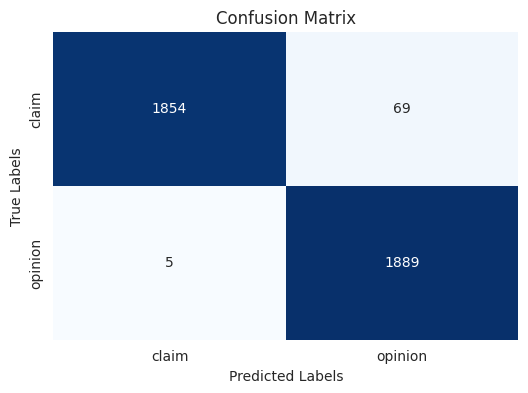

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()